In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [7]:
df.duplicated().sum()

127

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(9873, 6)

### Univariate Analysis

In [13]:
## Ques. Find the count of students on the basis of Hours Studied
df['Hours Studied'].value_counts()

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

<Axes: xlabel='Hours Studied', ylabel='count'>

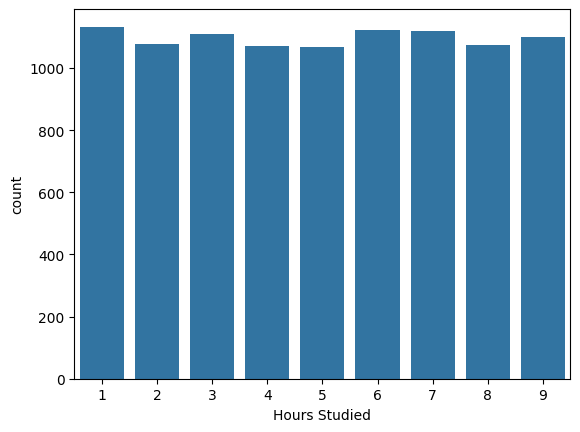

In [14]:
sns.countplot(x='Hours Studied', data=df)

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

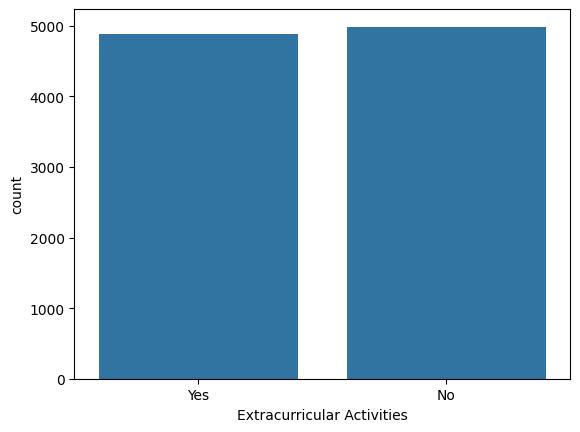

In [15]:
### Ques. How many students were involved in Extracurricular Activities
sns.countplot(x='Extracurricular Activities', data=df)

In [16]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [17]:
# Ques. Plot the distribution of the correlation between the performance index nad the previous scores 
# of all those students who were involved in extra curricular activities.
student_activities = df.groupby('Extracurricular Activities').get_group('Yes')

In [18]:
student_activities

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
...,...,...,...,...,...,...
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

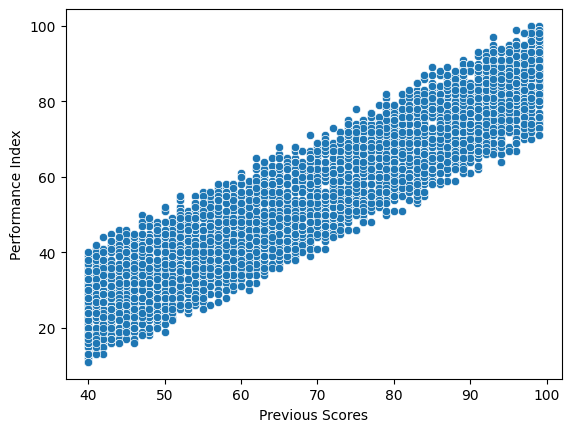

In [19]:
sns.scatterplot(x='Previous Scores', y='Performance Index', data=student_activities)

Previous Scores and Performance Index shows a positive correlation for all the students who were involved in extra curricular activities

In [20]:
# Ques. Plot the distribution of the correlation between the performance index nad the previous scores 
# of all those students who were not involved in extra curricular activities.
student_not_activities = df.groupby('Extracurricular Activities').get_group('No')

In [21]:
student_not_activities

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4,82,No,4,2,65.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0
...,...,...,...,...,...,...
9988,1,47,No,8,5,20.0
9989,3,46,No,5,8,27.0
9990,9,43,No,7,4,40.0
9992,9,52,No,9,7,50.0


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

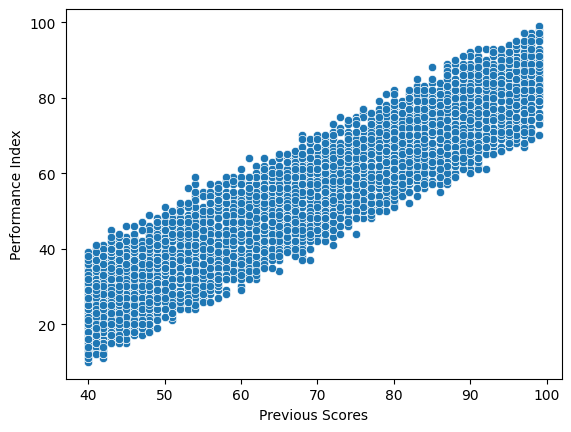

In [22]:
sns.scatterplot(x='Previous Scores', y='Performance Index', data=student_not_activities)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

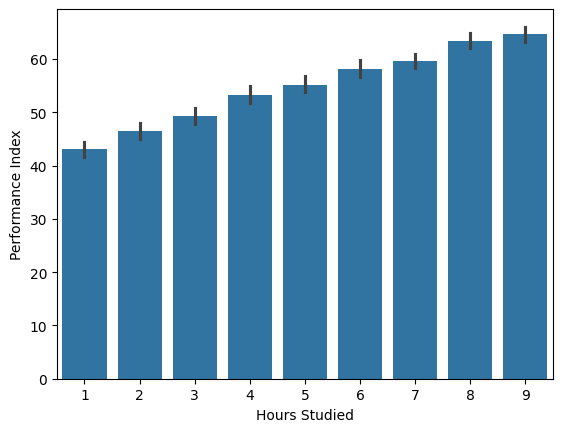

In [23]:
sns.barplot(x='Hours Studied', y='Performance Index', data=student_not_activities)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

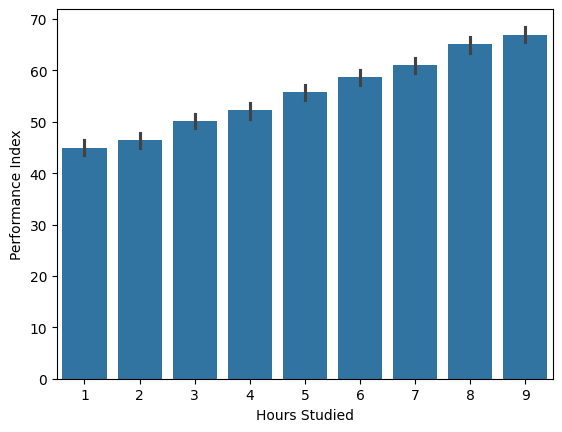

In [24]:
sns.barplot(x='Hours Studied', y='Performance Index', data=student_activities)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

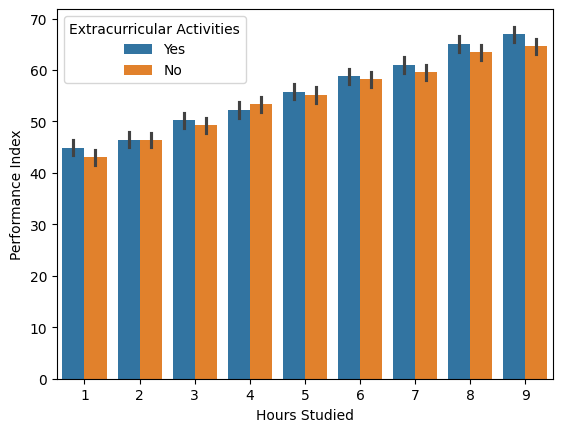

In [25]:
sns.barplot(x='Hours Studied', y='Performance Index', data=df, hue='Extracurricular Activities')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

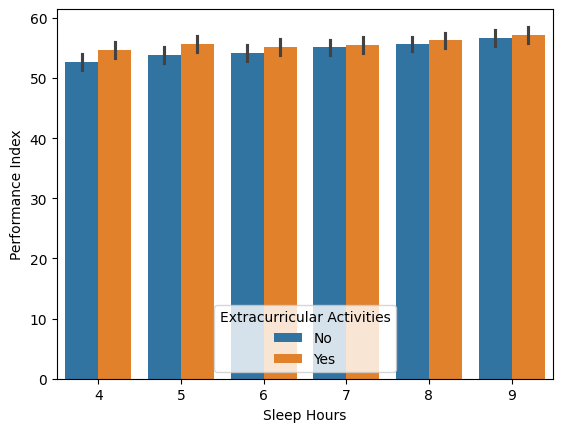

In [26]:
sns.barplot(x='Sleep Hours', y='Performance Index', data=df, hue='Extracurricular Activities')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

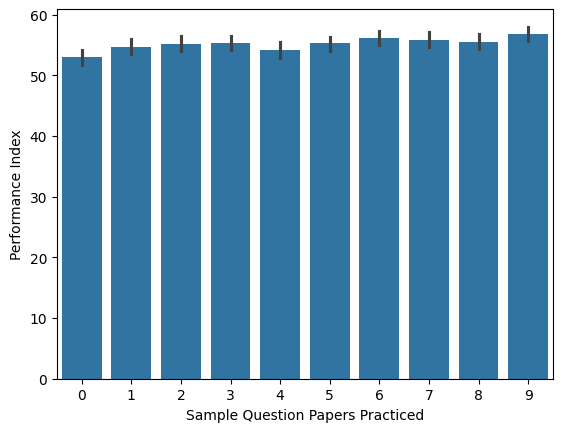

In [27]:
sns.barplot(x='Sample Question Papers Practiced', y='Performance Index', data=df)

<Axes: >

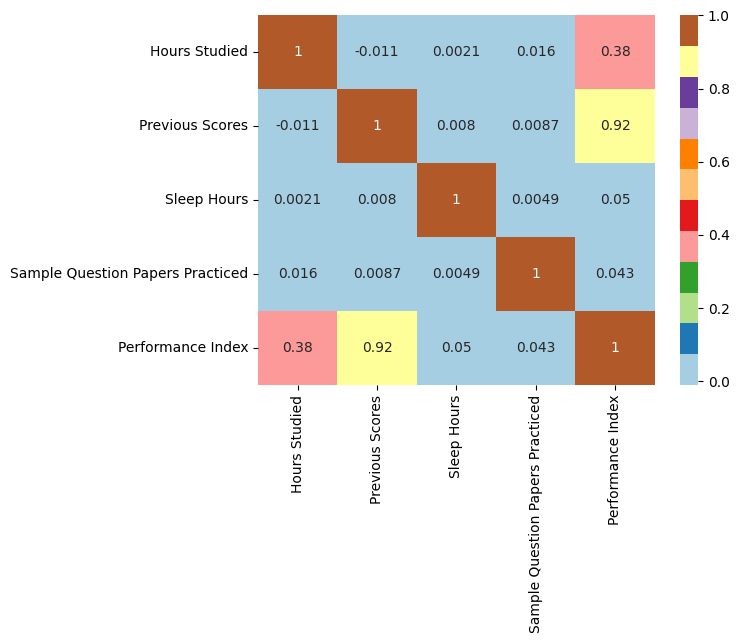

In [28]:
sns.heatmap(data=df.drop('Extracurricular Activities', axis=1).corr(), annot=True, cmap='Paired')

### Outlier Check

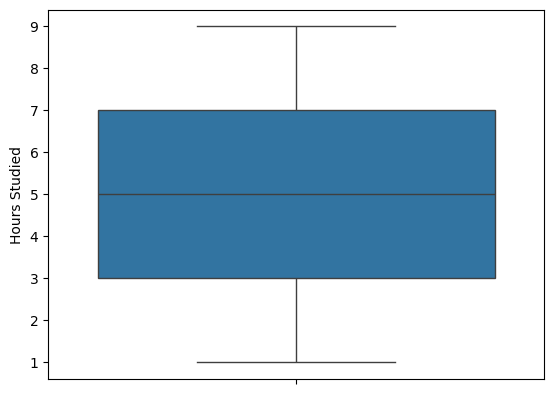

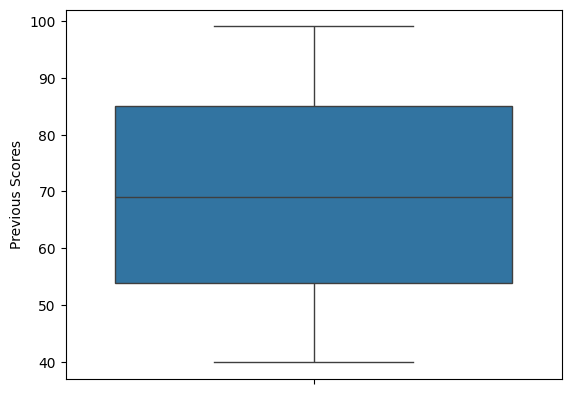

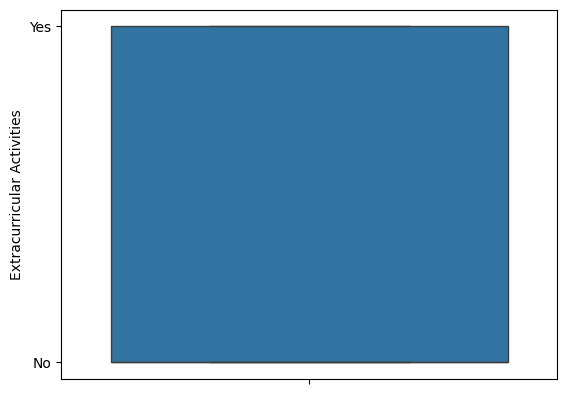

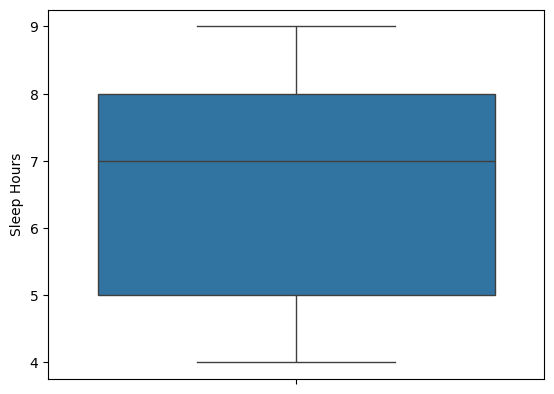

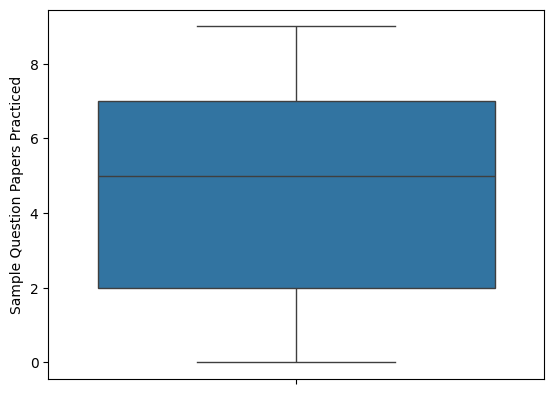

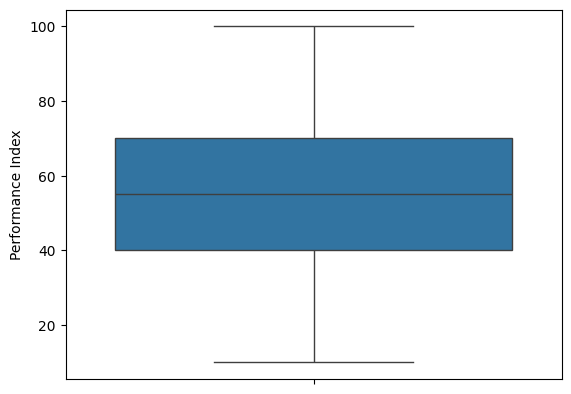

In [29]:
for d in df.columns:
    sns.boxplot(y=d, data=df)
    plt.show()
#     print(d)

In [30]:
df.select_dtypes(include='object')

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


In [31]:
df['Extracurricular Activities'].values

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [32]:
reshaped_data = df['Extracurricular Activities'].values.reshape(-1,1)

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit_transform(reshaped_data)

<9873x2 sparse matrix of type '<class 'numpy.float64'>'
	with 9873 stored elements in Compressed Sparse Row format>

In [34]:
encoder.fit_transform(reshaped_data).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [35]:
encoder.categories_[0]

array(['No', 'Yes'], dtype=object)

In [36]:
df[encoder.categories_[0]] = encoder.fit_transform(reshaped_data).toarray()

In [37]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,Yes,9,1,91.0,0.0,1.0
1,4,82,No,4,2,65.0,1.0,0.0
2,8,51,Yes,7,2,45.0,0.0,1.0
3,5,52,Yes,5,2,36.0,0.0,1.0
4,7,75,No,8,5,66.0,1.0,0.0


In [38]:
df.drop('Extracurricular Activities', axis=1, inplace=True)

In [39]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0


In [40]:
features = df.drop('Performance Index', axis=1)
features.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,No,Yes
0,7,99,9,1,0.0,1.0
1,4,82,4,2,1.0,0.0
2,8,51,7,2,0.0,1.0
3,5,52,5,2,0.0,1.0
4,7,75,8,5,1.0,0.0


In [41]:
target = df['Performance Index']
target.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [44]:
X_train.shape, X_test.shape

((7898, 6), (1975, 6))

**1. Linear Regression**

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [65]:
train_score_linreg = r2_score(y_train, model1.predict(X_train))
print('Training Score Linear Reg:', train_score_linreg)

Training Score Linear Reg: 0.9887293830095071


In [66]:
test_score_linreg = r2_score(y_test, model1.predict(X_test))
print('Test Score Linear Reg:', test_score_linreg)

Test Score Linear Reg: 0.9884801016066269


In [73]:
# saving the model
import pickle

pickle_out = open("dummy.pkl", mode = "wb")
pickle.dump(model1, pickle_out)
pickle_out.close()

In [75]:
X_train.head(1)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,No,Yes
7028,2,73,8,2,0.0,1.0


In [80]:
model1.predict([[6, 95, 7, 5, 1, 0]])

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.09812513])

In [81]:
model1.predict([[6, 95, 7, 5, 0, 1]])

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.73655012])

**2. KNN Regressor** 

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
model2 = KNeighborsRegressor(n_neighbors=5)

In [51]:
model2.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
train_score_knn = r2_score(y_train, model2.predict(X_train))
print('Training Score for KNN:', train_score_knn)

Training Score for KNN: 0.9885844079373475


In [53]:
test_score_knn = r2_score(y_test, model2.predict(X_test))
print('Test Score for KNN:', test_score_knn)

Test Score for KNN: 0.9826877578025067


**3. Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
model3 = DecisionTreeRegressor(max_depth=4)

In [56]:
model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [57]:
train_score_DT = r2_score(y_train, model3.predict(X_train))
print('Training Score for DT:', train_score_DT)

Training Score for DT: 0.9370699716701061


In [58]:
test_score_DT = r2_score(y_test, model3.predict(X_test))
print('Test Score for DT:', test_score_DT)

Test Score for DT: 0.9314139744684284


In [59]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.metrics import r2_score

models = [lr, knn, dt]

In [60]:
train = []
test = []
for m in models:
    if m == dt:
        mod = m(max_depth=5)
        mod.fit(X_train, y_train)
        train_score = r2_score(y_train, mod.predict(X_train))
        test_score = r2_score(y_test, mod.predict(X_test))
        train.append(train_score)
        test.append(test_score)
    else:
        mod = m()
        mod.fit(X_train, y_train)
        train_score = r2_score(y_train, mod.predict(X_train))
        test_score = r2_score(y_test, mod.predict(X_test))
        train.append(train_score)
        test.append(test_score)

In [61]:
# train.sort()
# test.sort()

train, test

([0.9887293830095071, 0.9885844079373475, 0.9642970621275441],
 [0.9884801016066269, 0.9826877578025067, 0.9622225140292858])

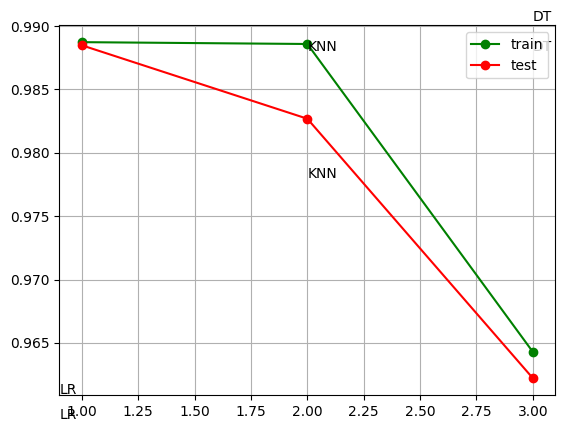

In [62]:
plt.plot(range(1,4), train, marker='o', color='green', label='train')
plt.plot(range(1,4), test, marker='o', color='red', label='test')
plt.legend()
plt.grid()
plt.text(0.9,0.959,'LR')
plt.text(0.9,0.961,'LR')
plt.text(2,0.988,'KNN')
plt.text(2,0.978,'KNN')
plt.text(3,0.988,'DT')
plt.text(3,0.9904,'DT')
plt.show()